Bank Customer Churn Model

OBJECTIVE:The objective of the bank customer churn model project is to develop a predictive model that accurately identifies customers who are likely to leave the bank (churn).

**DATA SOURCE : Kaggle(publicly available datasets)


Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import Data

In [77]:
df=pd.read_csv("Bank Customer Churn Prediction.csv")

Describe Data

In [6]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.shape

(10000, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [9]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Data Visualization

<Axes: xlabel='churn', ylabel='count'>

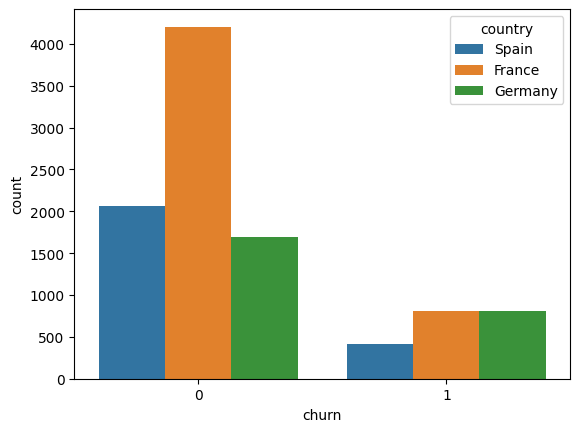

In [78]:
sns.countplot(hue='country',x='churn',data=df)

<Axes: xlabel='churn', ylabel='count'>

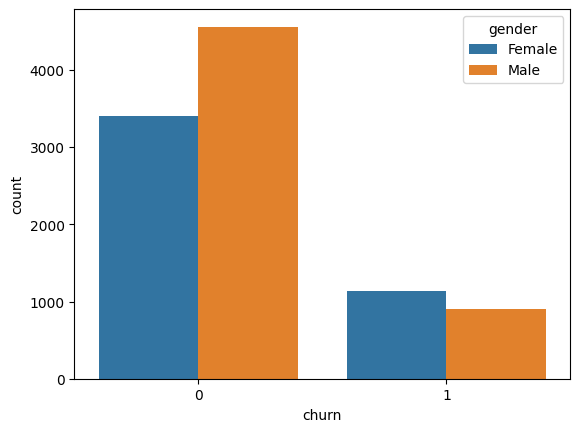

In [13]:
sns.countplot(hue='gender',x='churn',data=df)

<Axes: xlabel='churn', ylabel='count'>

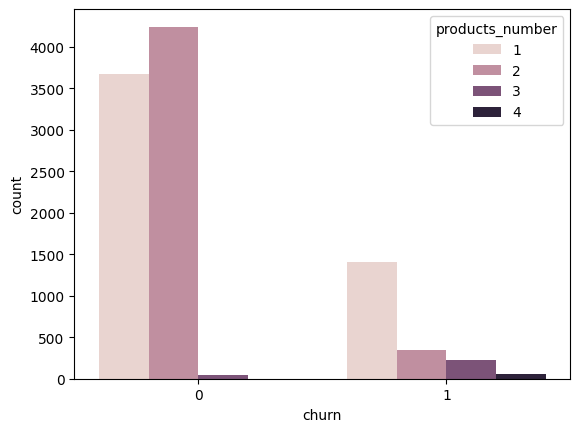

In [14]:
sns.countplot(hue='products_number',x='churn',data=df)

Data Preprocessing

In [10]:
df.duplicated('customer_id').sum()

0

In [11]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [21]:
df['country'].value_counts()

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [22]:
df.replace({'country':{'France':0,'Germany':1,'Spain':2}},inplace=True)

In [23]:
df['gender'].value_counts()

gender
Male      5457
Female    4543
Name: count, dtype: int64

In [24]:
df.replace({'gender':{'Male':0,'Female':1}},inplace=True)

In [25]:
df['products_number'].value_counts()

products_number
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [26]:
df.replace({'products_number':{1:0,2:1,3:2,4:3}},inplace=True)

In [27]:
df['credit_card'].value_counts()

credit_card
1    7055
0    2945
Name: count, dtype: int64

Defining Target Variable(y) and feature variables(X)

In [28]:
x=df.drop(['churn'],axis=1)
y=df['churn']

In [29]:
x.shape,y.shape

((10000, 11), (10000,))

In [30]:
df['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

In [31]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(random_state=42)

In [32]:
x_rus,y_rus=rus.fit_resample(x,y)

In [33]:
x_rus.shape,y_rus.shape,x.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [34]:
y_rus.value_counts()

churn
0    2037
1    2037
Name: count, dtype: int64

In [35]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=42)

In [36]:
x_ros,y_ros=ros.fit_resample(x,y)

Train Test Split

In [64]:
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)


In [65]:
from sklearn.model_selection  import train_test_split
x_train_rus,x_test_rus,y_train_rus,y_test_rus=train_test_split(x_rus,y_rus,random_state=42,test_size=0.2)

In [39]:
from sklearn.model_selection  import train_test_split
x_train_ros,x_test_ros,y_train_ros,y_test_ros=train_test_split(x_ros,y_ros,random_state=42,test_size=0.2)

In [40]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [92]:
x_train[['credit_score','age','balance','products_number','estimated_salary','country']]=sc.fit_transform(x_train[['credit_score','age','balance','products_number','estimated_salary','country']])

In [93]:
x_test[['credit_score','age','balance','products_number','estimated_salary','country']]=sc.fit_transform(x_test[['credit_score','age','balance','products_number','estimated_salary','country']])

In [103]:
x_train_rus[['credit_score','age','balance','products_number','estimated_salary','country']]=sc.fit_transform(x_train_rus[['credit_score','age','balance','products_number','estimated_salary','country']])

In [104]:
x_test_rus[['credit_score','age','balance','products_number','estimated_salary','country']]=sc.fit_transform(x_test_rus[['credit_score','age','balance','products_number','estimated_salary','country']])

In [105]:
x_train_ros[['credit_score','age','balance','products_number','estimated_salary','country']]=sc.fit_transform(x_train_ros[['credit_score','age','balance','products_number','estimated_salary','country']])

In [106]:
x_test_ros[['credit_score','age','balance','products_number','estimated_salary','country']]=sc.fit_transform(x_test_ros[['credit_score','age','balance','products_number','estimated_salary','country']])

Modeling

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC

In [42]:
model=LogisticRegression()

Model Evaluation

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
param_grid={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf'],'class_weight':['balanced']}

In [63]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3,cv=2)
grid.fit(x_train_ros,y_train_ros)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV 1/2] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.503 total time=   7.0s
[CV 2/2] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.503 total time=   5.2s
[CV 1/2] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf;, score=0.503 total time=   6.4s
[CV 2/2] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf;, score=0.503 total time=   7.2s
[CV 1/2] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf;, score=0.503 total time=   5.2s
[CV 2/2] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf;, score=0.503 total time=   6.7s
[CV 1/2] END C=0.1, class_weight=balanced, gamma=0.001, kernel=rbf;, score=0.503 total time=   6.1s
[CV 2/2] END C=0.1, class_weight=balanced, gamma=0.001, kernel=rbf;, score=0.503 total time=   7.4s
[CV 1/2] END C=1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.890 total time=   5.1s
[CV 2/2] END C=1, class_weight=balanced, gamma=1, kernel=rb

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
             verbose=3)

In [48]:
print(grid.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [50]:
model.fit(x_train,y_train)

LogisticRegression()

prediction

In [51]:
y_pred=model.predict(x_test)

In [52]:
accuracy_score(y_test,y_pred)

0.8035

In [53]:
svc=SVC()

In [82]:
svc.fit(x_train_ros,y_train_ros)

SVC()

In [81]:
y_pred_ros=svc.predict(x_test_ros)

In [80]:
grid_pred_ros=grid.predict(x_test_ros)

In [69]:
confusion_matrix(y_test_ros,grid_pred_ros)

array([[1633,    0],
       [  65, 1488]])

In [83]:
accuracy_score(y_test_ros,grid_pred_ros)

0.9795982423101067

In [79]:
print(classification_report(y_test_ros,grid_pred_ros))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1633
           1       1.00      0.96      0.98      1553

    accuracy                           0.98      3186
   macro avg       0.98      0.98      0.98      3186
weighted avg       0.98      0.98      0.98      3186



Explanation:
I have downloaded dataset from kaggle website.
Step-1:Importing libraries like numpy,pandas,matplotlib

Step-2:Importing the data and describing shape,info,head.

step-3:Data Visualization:ploting the histograms,barchart
and checking the people who leaves the bank on which basis.

step-4:data cleaning:checking about null values,duplicates and make sure the columns should be in numeric form only to apply logistic regression.

step-5:Defining target variable and feature variables.Importing train_test_split and defining x_train,x_test,y_train,y_test. use RandomUnderSampling and RandonOverSampling beacause the people leaving the bank are far less compared to people staying.

step-6:Import LogisticRegression,SupportVectorMachine to predict the data.use Hperturning to increase accuracy.Import x_train,y_train from orginal data,RandomOverSampling,RandomUndersampling.

step-7:predict the data in all models and check classificationreport.
















